In [1]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CIVPART,RIMP,DOMINV,output
0,66.560929,1819.155332,1914.319864,15027.237816
1,66.569350,1859.068502,1935.388276,15113.308363
2,66.509278,1875.057480,1945.436039,15158.336168
3,66.459690,1896.678644,1953.233062,15228.158837
4,66.440576,1895.300800,1972.183579,15185.248872
5,66.531288,1900.547284,1914.721368,15332.112763
6,66.504180,1929.908768,1936.138662,15381.980062
7,66.443433,1944.383621,1959.028009,15389.357557
8,66.408931,1959.349228,1965.673323,15434.805824
9,66.449291,1961.940780,1983.950547,15397.531507


In [3]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

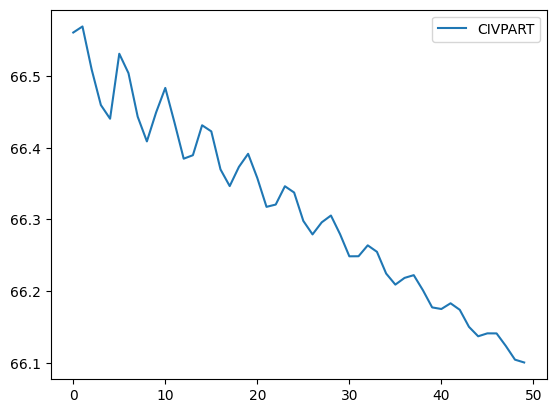

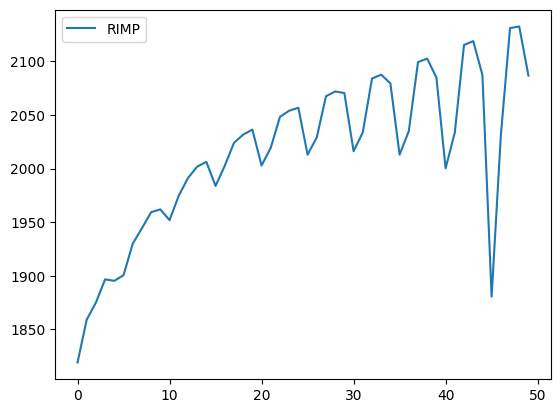

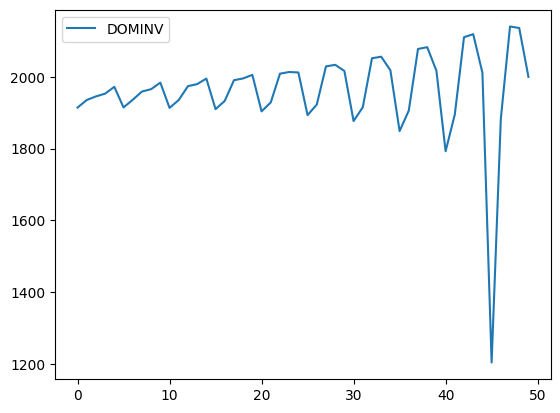

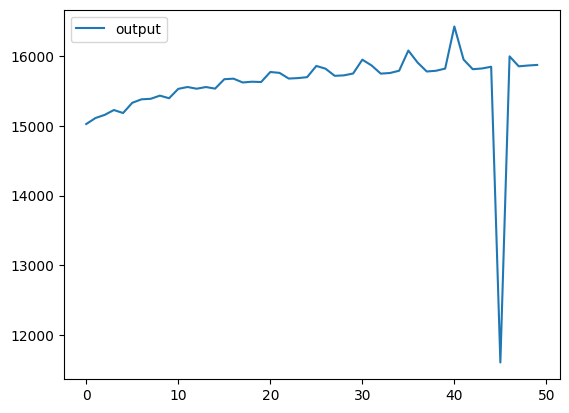

<Figure size 640x480 with 0 Axes>

In [4]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

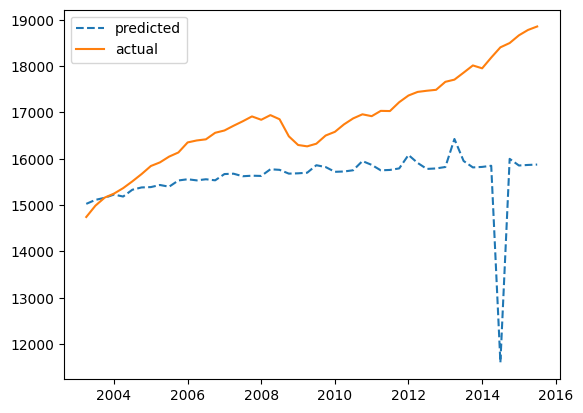

In [5]:
pred = df['output']
act = act.iloc[5:55]

pred.index = act.index

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [6]:
r2_score(act, pred)

-1.8362125995035927

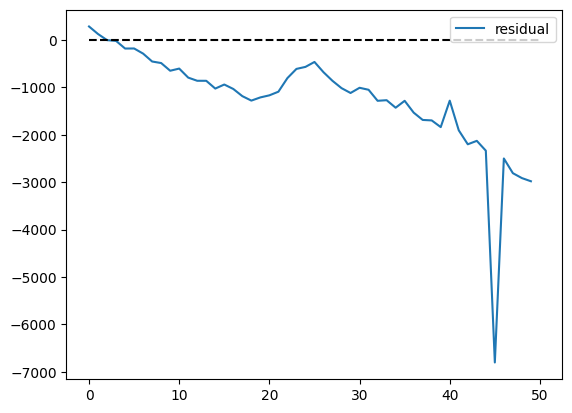

In [7]:
resid = (pred - act['RGDP']).reset_index(drop=True)
resid.plot(label='residual')
plt.hlines(0, 0, 50, linestyle='--', color='black')
plt.legend()
plt.show()